<a href="https://colab.research.google.com/github/ZhizhchenkoA/Mechanic_Project/blob/main/Mechanics_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Научно-исследовательская работа</h1>

<h2 align="center"><b>"Численное моделирование механических систем"</b></h2>

<i>Выполнили:
* Липская Мария
* Карасева Ольга
* Жижченко Александр
* Пругло Иван  

Научный руководитель:
* Федоров Владимир Сергеевич

*Цели работы*:
* научиться численно моделировать механические системы
* изучить решения ограниченной задачи трёх тел
* разобраться с положением равновесия в точках Лагранжа


<h1 align="center"><b>Введение</b></h1>

_________________
  
<h2 align="center"><i><b>Основные используемые понятия</b></i></h2>

1. *Точки Лагранжа* - точки в системе из двух массивных тел, в которых третье тело с пренебрежимо малой массой, не испытывающее воздействия никаких других сил, кроме гравитационных со стороны двух первых тел, может оставаться неподвижным относительно этих тел.

1. *Полость Роша* - область вокруг объекта в двойной системе, границей которой служит эквипотенциальная поверхность, содержащая первую точку Лагранжа $L_1$

1. *Сфера Хилла* - пространство вокруг объекта, на котором он может удерживать спутники
1. *Гамильтониан* - основная функция, используемая в механике и динамике Гамильтона  
*Вид гамильтониана, используемый в работе:*

$$
  H(x, y, p_x, p_y) = \frac{(p_x + y)^2 + (p_y - x)^2}{2} - U(x, y)
$$


5. *Лагранжиан* - функция описание динамической системы через обобщённые координаты (координаты $(x, y)$ и скорости $(\dot x, \dot y)$). Общий вид:
$L(x, y, \dot x, \dot y) = T - U(x, y)$.

*(Остальные необходимые определения указаны в нужных ячейках)*

Используемые библиотеки:
* numpy - для использования массивов Python и выполненимя математических операций над ними
* matplotlib - для построения графиков, используя графическую оболочку pyplot
* math - для выполнения сложных математичсеких операций
* tqdm - для отображения прогресс-бара (удобный вариант просмотра стадии выполнения функции)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

Ниже представлены используемые математические функции:
* Потенциал системы
$$
U(x, y) = \frac{x^2+y^2}{2} + \frac{1 - \mu}{r_1} + \frac{\mu}{r_2} + \frac{\mu (1 - \mu)}{2}
$$
где

$$
 r_1 = \sqrt{(x + \mu)^2 + y^2};\;\;\;
 r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

$$
 \mu = \frac{m_2}{m_1 + m_2}\\
$$

* Гамильтониан системы, состоящей из двух массивных тел и третьего тела с $m → 0$

$$
H(x, y, p_x, p_y) = \frac{(p_x + y)^2 + (p_y - x)^2}{2} - U(x, y)
$$

* Угловая скорость вращения системы $\omega = 1$
* Координаты первого тела $(-\mu;0)$
* Координаты первого тела $(1-\mu;0)$
* Координаты центра масс системы $(0, 0)$

Будем рассматривать задачу в плоскости, поэтому координата $z$ не нужна.


Для решения ограниченной задачи трёх тел с использованием гамильтониановой механики необходимо получить уравнения движения: скорости ($\dot x$ и $\dot y$) и производные по импульсу ($ \dot p_x$ и $\dot p_y$)<br>
Из гамильтониана:

\begin{gather}
  \dot x = \frac{\partial H}{\partial p_x} = p_x  + y\\
  \dot y = \frac{\partial H}{\partial p_y} = p_y  - x\\
  \dot p_x = - \frac{\partial H}{\partial y} = p_y - x + \frac{\partial}{\partial y}U(x, y)\\
  \dot p_y = - \frac{\partial H}{\partial y} = - p_x - y + \frac{\partial}{\partial y}U(x, y)
\end{gather}

Нашей задачей было численное решение ограниченной задачи трёх тел, поэтому производные и их изменения считались с помощью теоремы  Лагранжа (теорема о конечных приращениях).

In [2]:

mu = 0.2 # приведённое отношение масс объектов
def f(x, y):
    """Функция U(x, y)"""
    r1 = ((x + mu) ** 2 + y ** 2) ** 0.5
    r2 = ((x - 1 + mu) ** 2 + y ** 2) ** 0.5
    return (x ** 2 + y ** 2) / 2 + (1 - mu) / r1 + mu / r2 + ((1 - mu) * mu) / 2

def ro(k, x, y, px, py):
    """Линеаризация значений в коллинеарных точках Лагрнжа"""
    ro = mu * abs(k - 1 + mu) ** (-3) + (1 - mu) * abs(k + mu) ** (-3)
    a = 2 * ro + 1
    b = ro - 1
    return 0.5 *((px + y) ** 2 + (py - x) **2 - a * x ** 2 + b * y ** 2)

def h(x, y, px, py):
    """Гамильтониан системы"""
    return ((px + y) ** 2 + (py - x) ** 2) / 2 - f(x, y)

def diff_u_x(x, y):
    """Производная в точке от U(x, y) по x"""
    delta = 0.00001
    return (-1) * (f(x + delta, y) - f(x, y)) / delta

def diff_u_y(x, y):
    """Производная в точке от U(x, y) по y"""
    delta = 0.00001
    return (-1) * (f(x, y + delta) - f(x, y)) / delta

def x_dot(x, y, px, py):
    """Скорость по x"""
    return px + y

def y_dot(x, y, px, py):
    """Скорость по y"""
    return py - x

def px_dot(x, y, px, py):
    """Производная по px"""
    return py - x + diff_u_x(x, y)

def py_dot(x, y, px, py):
    """Производная по py"""
    return -px - y + diff_u_y(x, y)

def W(x, y):
    """Функция нормализации значения"""
    return -math.log((abs(diff_u_x(x, y)) + abs(diff_u_y(x, y))) ** 0.01 + 1e-10, 10)

def diff_h_px(x, y, px, py):
    """Производная в точке от H(x, y, px, py) по px"""
    delta = 0.0001
    return (h(x, y, px + delta, py) - h(x, y, px, py)) / delta

def diff_h_py(x, y, px, py):
    """Производная в точке от H(x, y, px, py) по py"""
    delta = 0.0001
    return (h(x, y, px, py + delta) - h(x, y, px, py)) / delta

def h_const(x, y, px=0, py=0):
    """Подсчёт постоянной Якоби"""
    return 0.5 * (x_dot(x, y, px, py) ** 2 + y_dot(x, y, px, py) ** 2) - f(x, y)

class FloatRange:
    """Класс для использования range с нецелыми числами"""
    def __init__(self, start, stop, step=1.0):
        if not isinstance(start, (int, float)) or \
            not isinstance(stop, (int, float)) or not isinstance(step, (int, float)):
            raise TypeError('start, stop, step должны быть числами!')
        if start > stop and step < 0 or stop > start and step > 0:
            self.start = float(start)
            self.stop = stop
            self.step = step
            self.value = self.start - self.step
        else:
            raise ValueError('введите корректные значения')

    def __iter__(self):
        self.value = self.start
        while self.value < self.stop and self.step > 0 \
             or self.value > self.stop and self.step < 0:

            yield self.value
            self.value += self.step
        return self

    def __len__(self):
        return int(abs(abs(self.start - self.stop) / self.step))


def frange(start, stop, step=1.0):
    """Функция для создания итератора на основе FloatRange"""
    return FloatRange(start, stop, step)


<h1 align="center"> Эпизод I<br> <b>Визуализация точек Лагранжа, полости Роша и сферы Хилла</b></h1>

_________________
Для наглядного представления точек Лагранжа нами была выбрана функция `imshow` из пакета `matplotlib.pyplot`. Она задаёт изображение, как двумерный массив пикселей (в нашем коде массив `DAT`). Его заполнение осуществлялось с помощью перебора значений `i` от 0 до `(lim_x_max - lim_x_min) / step_x` и `j` от 0 до `(lim_y_max - lim_y_min) / step_y`. Каждому пикселю `DAT[i][j]` присваивалось значение `W(i, j)`. Для большей наглядности результата изображение было выведено в чёрно-белом формате `cmap='gray'`


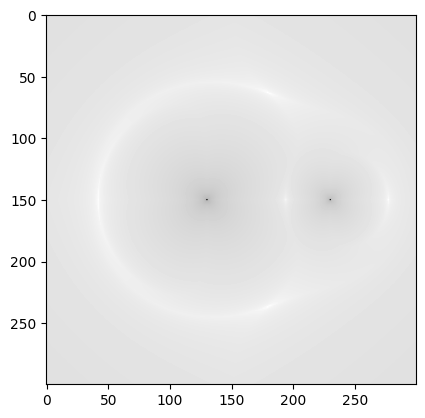

In [3]:
lim_x_min, lim_x_max = -1.5, 1.5
step_x = 0.01
lim_y_min, lim_y_max = -1.5, 1.5
step_y = 0.01
# x_massiv = int((lim_x_max - lim_x_min) / step_x)
# y_massiv = int((lim_y_max - lim_y_min) / step_y)
DAT = [[0] * len(frange(lim_x_min, lim_x_max, step_x)) for j in frange(lim_y_min, lim_y_max, step_y)]

for i, x in enumerate(frange(lim_x_min, lim_x_max, step_x)):
    for j, y in enumerate(frange(lim_y_min, lim_y_max, step_y)):
        DAT[j][i] = W(x, y)
# print(DAT)
plt.imshow(DAT, cmap='gray')
plt.show()

<h1 align="center"> Эпизод II<br> <b>Нахождение координат точек Лагранжа</b></h1>

_______________
Для нахождения координат точек Лагранжа, нами использовались массивы,
```
mx = np.arange(lim_x_min, lim_x_max, step_x)
my = np.arange(lim_y_min, lim_y_max, step_y)
```
которые задаются минимальными значениями, максимальными значениями и шагом изменения с помощью функции `numpy.arrange`. В итоговый массивы точек Лагранжа `ans_x` и `ans_y` заносились координаты, в которых $ \frac{∂}{\partial x}U(x, y) = 0$ и $ \frac{∂}{\partial y}U(x, y) = 0$ (реализовано с помощью приращений и теоремы Лагранжа)
Из массива итоговых точек были исключены координаты центра масс и тел, и получившиеся координаты были добавлены в массивы `L_x` и `L_y` и отсортированы по номеру точки.  
Координаты этих точек также задаются формулами:

\begin{gather}
L_1 \:(R(1 - \sqrt[3]{\frac{\mu}{3}},\; 0))\\
L_2 \:(R(1 + \sqrt[3]{\frac{\mu}{3}}, \; 0)\\
L_3 \:(R(1 - \frac{5}{12}\mu, \; 0)\\
L_4 \:(\frac{R}{2} \cdot \frac{m_1-m_2}{m_1+m_2}, \; \frac{\sqrt[3]{3}}{2}R)\\
L_5 \:(\frac{R}{2} \cdot \frac{m_1-m_2}{m_1+m_2}, \; -\frac{\sqrt[3]{3}}{2}R)\\
\end{gather}

где:  

* $m_1$ - масса большего тела  
* $m_2$ - масса меньшего тела   
* $R$ - расстояние между телами


In [4]:

# mx = np.arange(lim_x_min, lim_x_max, step_x)
# my = np.arange(lim_y_min, lim_y_max, step_y)
ans_x, ans_y = np.array([]), np.array([])
xg, yg = [], []
epsilon = 0

for x in tqdm(frange(lim_x_min, lim_x_max, step_x)):
    for y in frange(lim_y_min, lim_y_max, step_y):
        if (f(x, y) - f(x - step_x, y)) * (f(x + step_x, y) - f(x, y)) < epsilon and \
        (f(x, y) - f(x, y - step_y)) * (f(x, y + step_y) - f(x, y)) < epsilon:
            ans_x = np.append(ans_x, x)
            ans_y = np.append(ans_y, y)
            xg.append(int((lim_x_min + x) * (1 / step_x)))
            yg.append(int((lim_y_min + y) * (1 / step_y)))

L_x = [ans_x[6], ans_x[8], ans_x[0], ans_x[3], ans_x[2]]
L_y = [ans_y[6], ans_y[8], ans_y[0], ans_y[3], ans_y[2]]

100%|██████████| 300/300 [00:00<00:00, 589.01it/s]


<h1 align="center"> Эпизод III<br> <b>Моделирование движения вблизи точек Лагранжа</b></h1>

__________

Движение точки в задаче трёх тел описывается уравнениями движения, описанными во введении. В программе перемещение точки задаётся функцией `move(x, y, px=0, py=0, t=100000, scfale_large)`, где `x` и `y` - обязательные параметры, являющиеся начальными координатами, а `px` и `py` начальные импульсы тела, `t` - общее время движения тела, `scale_large` (если `True`, то показано движение тела относительно системы тел, если `False`, то демонстрируется движение у точки Лагранжа)

In [5]:

def move(x, y, px=0, py=0, t = 100000, scale_large=False):
    delta_t = 0.0001
    X, Y, PX, PY = [x], [y], [px], [py]
    for _ in tqdm(range(t)):
        X.append(X[-1] + x_dot(x, y, px, py) * delta_t)
        Y.append(Y[-1] + y_dot(x, y, px, py) * delta_t)
        PX.append(PX[-1] + px_dot(x, y, px, py) * delta_t)
        PY.append(PY[-1] + py_dot(x, y, px, py) * delta_t)
        x = X[-1]
        y = Y[-1]
        px = PX[-1]
        py = PY[-1]

    return (X, Y)
    if scale_large:
        plt.scatter([-mu, 1 - mu], [0, 0], c='green')
        plt.scatter(ans_x, ans_y, c='black')
        plt.xlim(-1.5, 1.5)
        plt.ylim(-1.5, 1.5)
#   plt.show()

<h1 align="center"> Эпизод IV<br> <b>Подбор параметров движения в точках Лагранжа</b></h1>

_________

После нахождения координат точек Лагранжа необходимо задать параметры движения по орбите, чтобы тело двигалось вокруг точки Лагранжа по эллипсу: начальный импульс ($p_x$, $p_y$), а также начальное время `t`.  

В точках $L_4$ и $L_5$ наблюдается устойчивое равновесие, из-за чего тело при удалении от этих точек стремится вернуться в их окрестности, поэтому движению в этих точках описывается множеством значений $p_x$ и $p_y$ (нами были взяты значения $\pm 1$ и $0.5$ соответственно).  

В точках $L_1, L_2, L_3$ тело находится в положении неустойчивого равновесия, поэтому количество удовлетворяющих условию начальных импульсов значительно меньше. Вначале было решено подобрать параметры с помощью производных ($\frac{\partial H}{\partial p_x} = 0, \frac{\partial H}{\partial p_y} = 0$), подсчёт которых реализован в виде функции `ext_h(i)` (где `i` - номер точки Лагранжа), но из-за недостаточно точных расчётов параметры были подобраны бинарным поиском (функция `ext_h(i)` при маленьком `delta` работает очень медленно).

Итоговые параметры продемонстрированы в коде ниже (каждая точка Лагранжа строится в отдельной ячейке и к ней написаны характеристики получившегося эллипса). В точках $L_4, L_5$ существует множество устойчивых траекторий, поэтому характеристики орбит в данных точках мы не вычисляли.

In [6]:

delta = 0.00001
px_arr = np.arange(-1, 1, delta)
py_arr = np.arange(-1, 1, delta)

def ext_h(i):
  epsilon = 0

  x = L_x[i]
  y = L_y[i]
  delta = 0.1
  px_arr = np.arange(-1, 1, delta)
  py_arr = np.arange(-1, 1, delta)

  for px in px_arr:
    for py in py_arr:
      if diff_h_px(x, y, px, py) * diff_h_px(x, y, px - delta, py) < epsilon and \
        diff_h_py(x, y, px, py) * diff_h_py(x, y, px, py - delta) < epsilon:

        return (px, py)
for i in range(5):
  print(ext_h(i))

(-2.220446049250313e-16, 0.49999999999999956)
None
(-2.220446049250313e-16, -1.0)
(-0.8, 0.2999999999999998)
(0.8999999999999995, 0.2999999999999998)


<h3>Параметры орбиты вокруг $L_1$:</h3>

$a ≈ 0.002$ - большая полуось

$b \approx 0.0006$ - малая полуось

$e \approx 0.95$ - эксцентриситет

100%|██████████| 14520/14520 [00:00<00:00, 83496.77it/s]


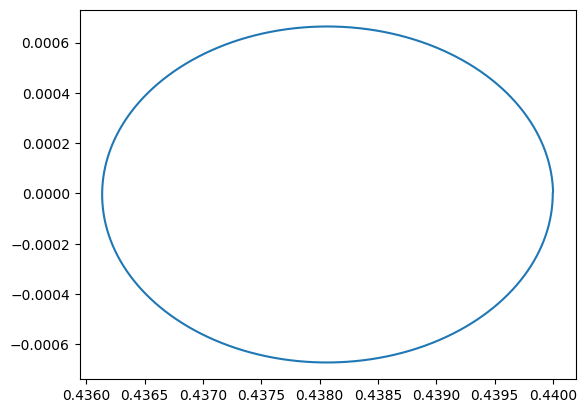

In [7]:
L1 = move(L_x[0] - 1e-6, L_y[0], px=0, py=0.4371024, t=14520)
plt.plot(L1[0], L1[1])
plt.show()

<h3>Параметры орбиты вокруг $L_2$:</h3>

$a ≈ 0.002$ - большая полуось

$b \approx 0.000124$ - малая полуось

$e \approx 0.8$ - эксцентриситет

100%|██████████| 21500/21500 [00:00<00:00, 85722.70it/s]


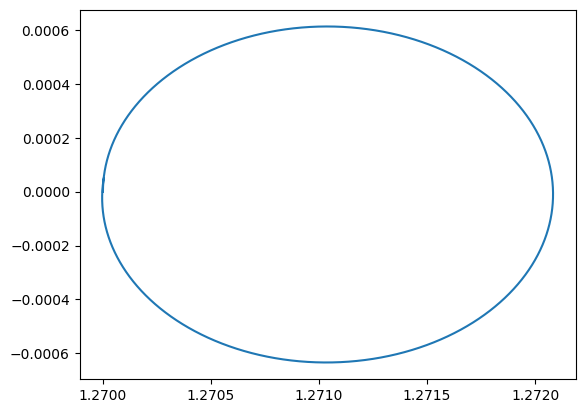

In [8]:
L2 = move(L_x[1], L_y[1], px=0, py=1.27183, t=21500)
plt.plot(*L2)
plt.show()

<h3>Параметры орбиты вокруг $L_3$:</h3>

$a ≈ 0.00275$ - большая полуось

$b \approx 0.002$ - малая полуось

$e \approx 0.69$ - эксцентриситет

100%|██████████| 23500/23500 [00:00<00:00, 82655.39it/s]


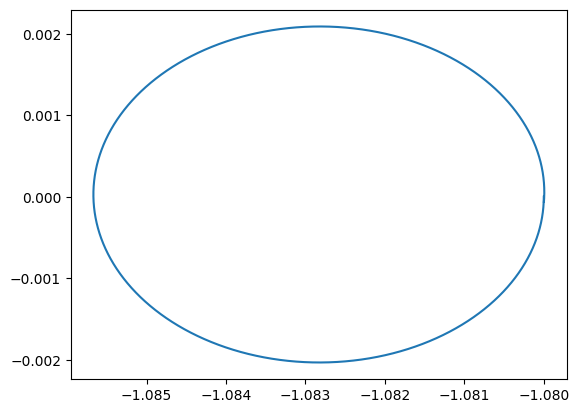

In [9]:
L3 = move(L_x[2], L_y[2], px=0, py=-1.0855, t=23500)
plt.plot(*L3)
plt.show()

100%|██████████| 1000000/1000000 [00:12<00:00, 80877.74it/s]


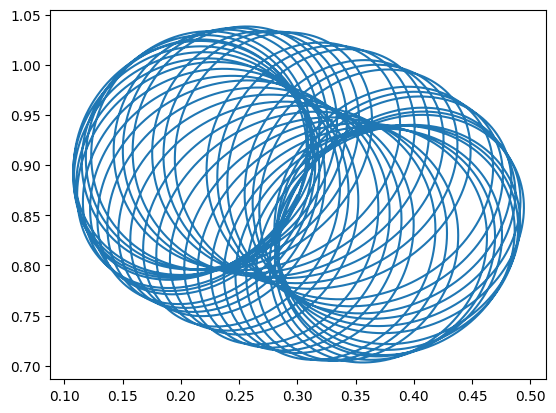

In [10]:
L4 = move(L_x[3], L_y[3], px=-1, py=0, t=1000000)
plt.plot(*L4)
plt.show()

100%|██████████| 1000000/1000000 [00:13<00:00, 73489.74it/s]


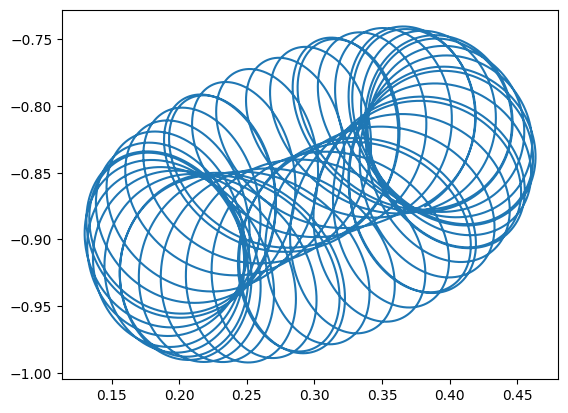

In [11]:
L5 = move(L_x[4], L_y[4], px=0.9, py=0.5, t=1000000)
plt.plot(*L5)
plt.show()

<h1 align="center"> Эпизод V<br> <b>Моделирование движения тела на замкнутой орбите</b></h1>

_______

Для оценки траектории движения тела на замкнутой орбите нами была построена орбита с характеристиками: $p_x = 0, \:p_y = 0$ и $x, y$ - координаты $L_1$.
По данным этой орбиты было построено сечение Пуанкаре при $y = 0$. Оно отражает зависимость $\dot x$ от $x$ (зависимоть скорости при пересечении траекторией прямой $y = 0$ от координаты $x$ точки пересечения.

100%|██████████| 550000/550000 [00:07<00:00, 74730.27it/s]


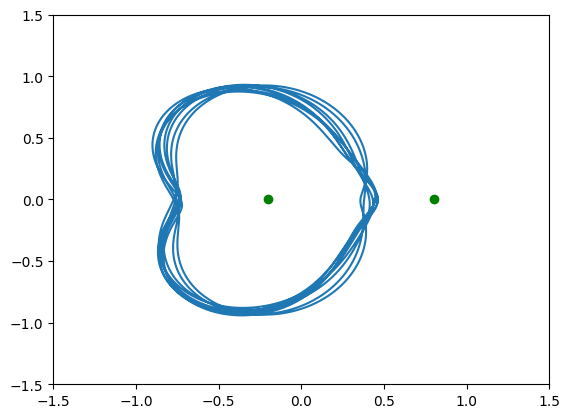

In [12]:
x, y = L_x[0], L_y[0]
px, py = 0, 0
t = 550000
delta_t = 1e-4
x_result, x_dot_result = [], []
X, Y, PX, PY = [x], [y], [px], [py]

for _ in tqdm(range(t)):
    X.append(X[-1] + x_dot(x, y, px, py) * delta_t)
    Y.append(Y[-1] + y_dot(x, y, px, py) * delta_t)
    PX.append(PX[-1] + px_dot(x, y, px, py) * delta_t)
    PY.append(PY[-1] + py_dot(x, y, px, py) * delta_t)
    x = X[-1]
    y = Y[-1]
    px = PX[-1]
    py = PY[-1]
    if -3e-3 <= y <= 3e-3:
        x_result.append(x)
        x_dot_result.append(px)

plt.plot(X, Y)
plt.scatter([-mu, 1 - mu], [0, 0], c='green')
# plt.scatter(ans_x, ans_y, c='black')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

Построение сечения Пуанкаре для тела на замкнутой орбите.

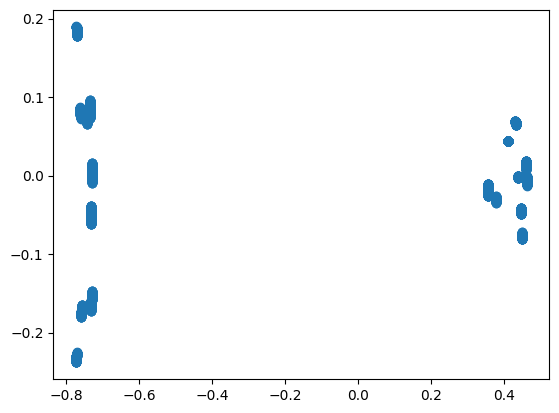

In [13]:
plt.scatter(x_result, x_dot_result)
plt.show()

Для незамкнутой траектории

100%|██████████| 550000/550000 [00:05<00:00, 101423.26it/s]


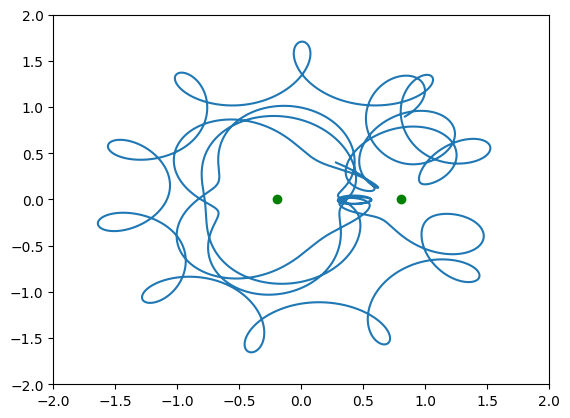

In [14]:
# @title Изменения начальных параметров орбиты { display-mode: "form" }
# @title String fields

x = 0.279 # @param {type:"slider", min:-1, max:1, step:0.001}
y = 0.4 # @param {type:"slider", min:-1, max:1, step:0.001}
px = 0.334 # @param {type:"slider", min:-1, max:1, step:0.001}
py = -0.145 # @param {type:"slider", min:-1, max:1, step:0.001}

t = 550000
delta_t = 1e-4
x_result, x_dot_result = [], []
X, Y, PX, PY = [x], [y], [px], [py]
for _ in tqdm(range(t)):
  X.append(X[-1] + x_dot(x, y, px, py) * delta_t)
  Y.append(Y[-1] + y_dot(x, y, px, py) * delta_t)
  PX.append(PX[-1] + px_dot(x, y, px, py) * delta_t)
  PY.append(PY[-1] + py_dot(x, y, px, py) * delta_t)
  x = X[-1]
  y = Y[-1]
  px = PX[-1]
  py = PY[-1]
  if -3e-3 <= y <= 3e-3:
    x_result.append(x)
    x_dot_result.append(px)
plt.plot(X, Y)
plt.scatter([-mu, 1 - mu], [0, 0], c='green')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

Сечение Пуанкаре



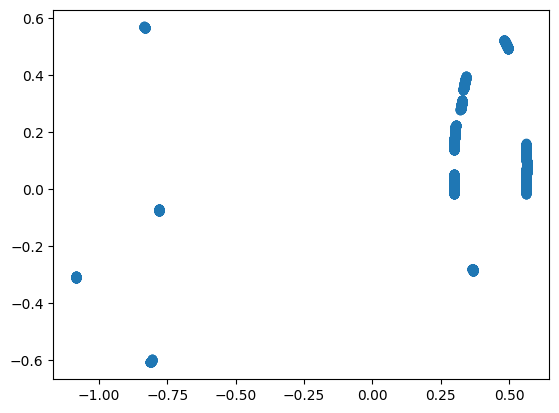

In [15]:
plt.scatter(x_result, x_dot_result)
plt.show()

<h1 align="center"> Эпизод VI<br> <b>Интеграл Якоби и моделирование эквипотенциальной поверхности</b></h1>

_________

<i>Вывод интеграла Якоби, единственной формы энергии, сохраняющейся в ограниченной задаче трёх тел:  
Интегрируем выражение </i>

$$
\frac{dU(x, y)}{dt} = \dot xU_x + \dot yU_y = \dot x\ddot x + \dot y\ddot y
$$  
и получаем
\begin{gather}
2U = \dot x^2 + \dot y^2 + C\\
C = -(\dot x^2 + \dot y^2) + 2U
\end{gather}

Поделим это выражение на 2

$$
C_j = \frac{(\dot x^2 + \dot y^2)}{2} - U
$$
где $C_j$ - постоянная Якоби.

Эквипотенциальные поверхности задаются с помощью следующего отображения

$$
H(h) = \{ (x, y) \:\colon U(x, y) + C_j \}
$$

В нашем случае нам необходимо оценить границы, в пределах которых движется третье тело, поэтому за начальную точку постоянной Якоби $C_j$ была выбрана точка Лагранжа $L_1$, импульсы $p_x$ и $p_y$.
Необходимые нам граничные точки удовлетворяют условию: $C_j + U(x, y) = 0$


 Код ниже вычисляет постоянную Якоби и на основании него строит эквипотенциальную поверхность (функция `h_const(x, y, px, py)`). С отклонением `epsilon` значение функции $U(x, y) + C_j = 0$

100%|██████████| 10000000/10000000 [02:13<00:00, 75083.28it/s]


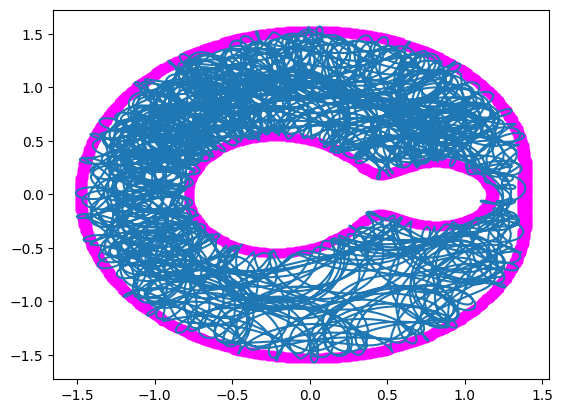

In [16]:
# x = np.arange(-1.75, 1.75, 0.01)
# y = np.arange(-1.75, 1.75, 0.01)
ans_x: list = []
ans_y: list = []
epsilon = 0.01
x0, y0, px0, py0 = L_x[0], L_y[0], 0, 0
const: float = h_const(x0, y0, px0, py0)

for i in tqdm(frange(-2, 2, 0.01)):
    for j in frange(-2, 2, 0.01):
        if  abs(f(i, j) + const) <= epsilon:
        # if f(i, j) + const > 0:
            ans_x.append(i)
            ans_y.append(j)

x, y = move(L_x[0], 0.5, t=10000000)
plt.scatter(ans_x, ans_y, color='magenta')
plt.plot(x, y)
plt.show()

<h1 align="center"> Эпизод VII<br> <b>Периодические орбиты</b></h1><hr>

Для начала введем неоторые определения.

В неподвижной (сидерической) системы отсчёта среднее движение $n$ периодическом движении с периодам $T_0$ определяется, как

$$
    T_0 = \frac{2 \pi}{n}
$$

В подвижной (синодической) системе отсчёта, вращающейся с периодом $2 \pi$ период будет другим, назовём его $T$. Пусть траектория начинает замыкаться при $pT_0 = T, p \in \mathbb {Z}$

\begin{equation}
    T = pT_0 = \frac{2 \pi p}{n} = 2 \pi q, \;\;n = \frac{p}{q}, \;\; q \in \mathbb{Z}
\end{equation}

<h3><b>Численный поиск периодических решений</b></h3><hr>

Рассмотрим следующие начальные условия:

\begin{cases}
    x(0) = x_0 \neq 0 \\
    y(0) = y_0 = 0\\
    \dot x (0) = \dot x_0 = 0\\
    \dot y(0) = \dot y_0 \neq 0
\end{cases}



In [27]:
def move_period(x, y, px, py, with_graphics=True):
    py0 = py
    delta_t = 0.0001
    t = 0
    T_all, T_half = [], []
    X, Y, PX, PY = [x], [y], [px], [py]
    while len(T_all) < 2:
        X.append(X[-1] + x_dot(x, y, px, py) * delta_t)
        Y.append(Y[-1] + y_dot(x, y, px, py) * delta_t)
        PX.append(PX[-1] + px_dot(x, y, px, py) * delta_t)
        PY.append(PY[-1] + py_dot(x, y, px, py) * delta_t)
        t += delta_t
        x = X[-1]
        y = Y[-1]
        px = PX[-1]
        py = PY[-1]

        if abs(y) <= 0.01 and x < - mu and len(T_half) == len(T_all):
            T_half.append(t)
        elif abs(y) <= 0.01 and x > - mu and len(T_half) - len(T_all) == 1:
            T_all.append(t)
            t = 0

    if with_graphics:
        plt.scatter([-mu, 1 - mu], [0, 0], c='green')
        # plt.scatter(ans_x, ans_y, c='magenta')
        plt.plot(X, Y, c='blue')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.show()

    return py0, *T_all, abs(T_all[0] - T_all[1])



py    T1     T2     T2 - T1


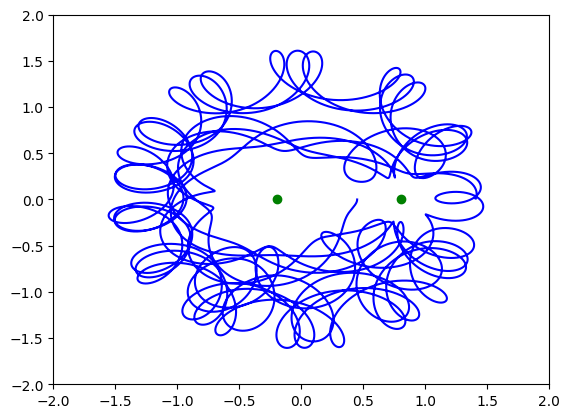

(0.2, 77.82200000145988, 64.85800000102952, 12.96400000043036)


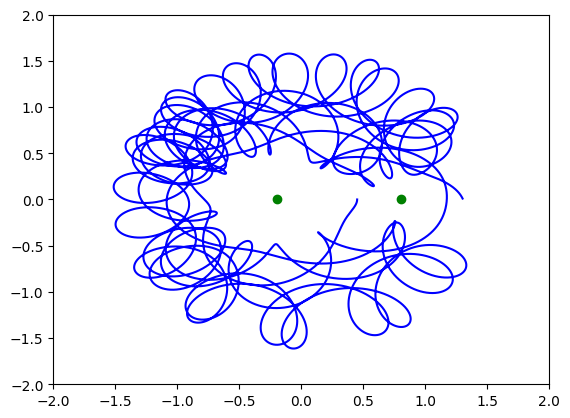

(0.12, 87.37820000177712, 32.167999999944335, 55.21020000183278)


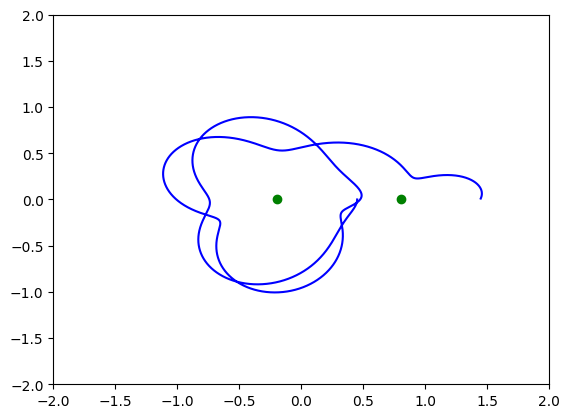

(0.05599999999999998, 6.4825999999982304, 8.517699999993487, 2.035099999995257)


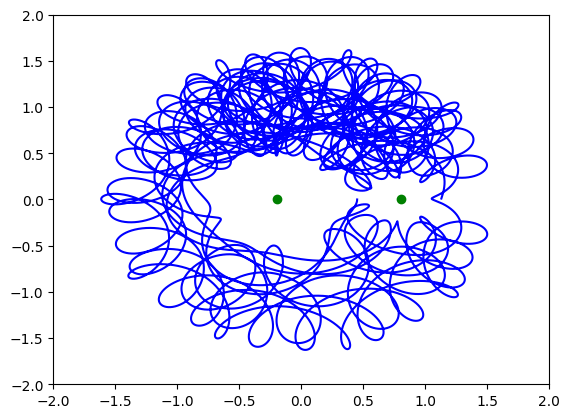

(0.10719999999999999, 145.83210000371758, 100.05620000219798, 45.7759000015196)


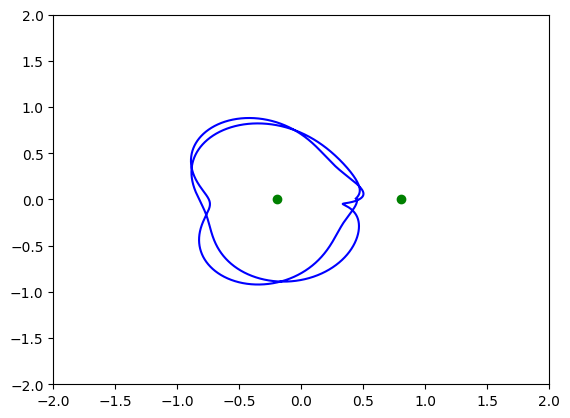

(0.06623999999999997, 6.591699999997976, 6.696399999997732, 0.10469999999975599)


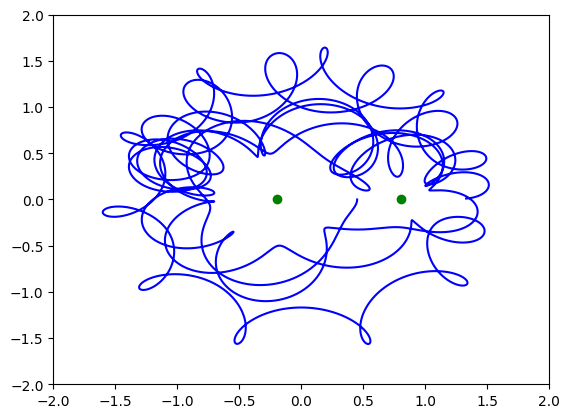

(0.09900799999999998, 69.50680000118385, 16.03439999997597, 53.47240000120787)


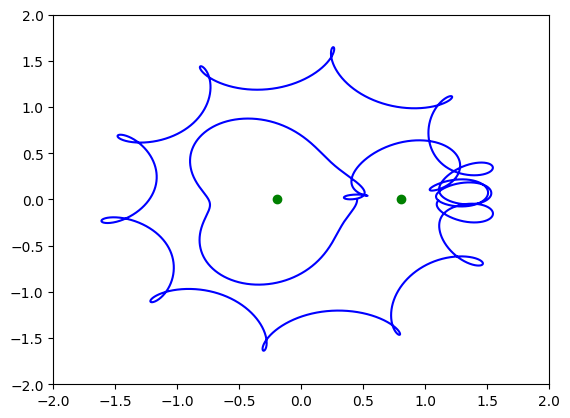

(0.07279359999999997, 6.71889999999768, 33.16339999997738, 26.444499999979698)


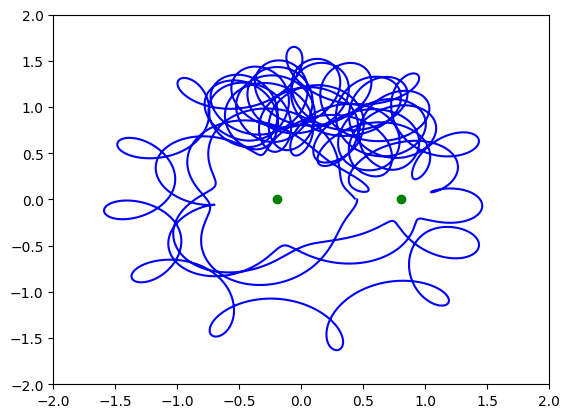

(0.09376511999999998, 10.247599999989456, 91.73320000192169, 81.48560000193223)


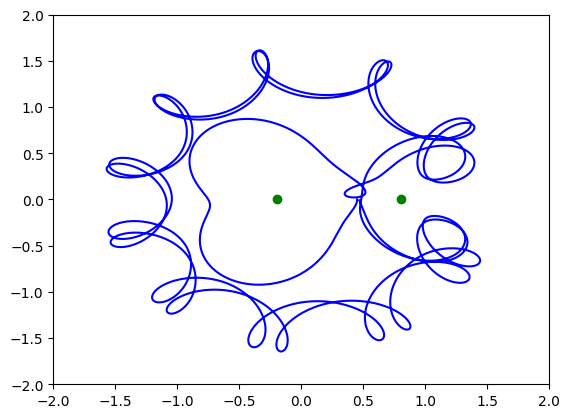

(0.07698790399999997, 35.68270000006101, 28.46029999994701, 7.222400000114)


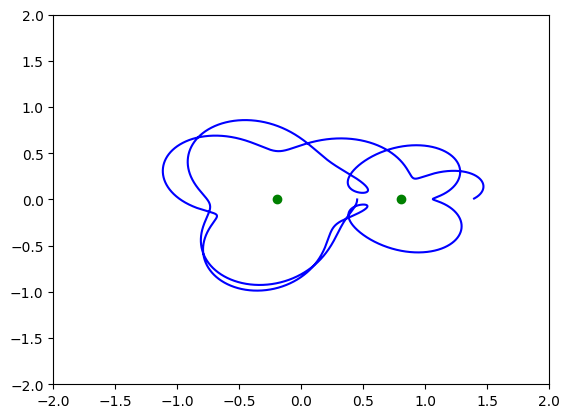

(0.09040967679999998, 9.410199999991407, 12.003999999985362, 2.593799999993955)


In [35]:
print('py    T1     T2     T2 - T1')
N = 8
mn = 10
lmd = 0.1
deltas_T = []
all_params = []
x = 0.45
py = 0.2
for i in range(10):
    ans = move_period(x, 0, 0, py)
    all_params.append(ans)
    deltas_T.append(ans[3])
    print(all_params[-1])
    lmd *= 0.8
    if len(deltas_T) >= 2:
        py -= lmd * np.sign(deltas_T[-1] - deltas_T[-2])
    else:
        py -= lmd

<h3> <b><i>Использованные источники:</i></b></h3>

__________

1. Heteroclinic Connections between Periodic Orbits and Resonance Transitions in Celestial Mechanics. Wang Sang Koon et al. 1997

2. Technical Report 32-1168; Periodic Orbits in the Restricted Three-Body Problem With Earth-Moon Masses. R.A. Broucke; NASA, California institute of technology. 1968.

3. Теория орбит, Ограниченная задача трех тел. В. Себехей; Наука. 1982.

4. Ландау Л. Д., Лифшиц Е. М. Механика. — Издание 5-е, стереотипное. — М.: Физматлит, 2004. — 224 с. — («Теоретическая физика», том I)

5. [Видео Moeckel Rick "Chaos in the Three-Body Problem"](https://youtu.be/tvlfG3e_0Es)
_______
